In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
from IPython.display import HTML, display
import seaborn as sns
import pyvis 

relationship_df = pd.read_csv('country_relationship.csv', index_col=0) 

In [2]:
relationship_df.tail(10)
relationship_df["value"] = 1

In [3]:
# Group by 'source' and 'target' to combine duplicates and sum their values
relationship_df = relationship_df.groupby(["source", "target"], sort=False, as_index=False).sum()

In [4]:
relationship_df.tail(10)

,source,target,value
106,Japan,Israel,5
107,Israel,Iran,5
108,Germany,India,5
109,Philippines,Afghanistan,5
110,Afghanistan,Romania,5
111,Romania,Russia,6
112,Russia,Vietnam,5
113,Vietnam,Lebanon,5
114,Lebanon,India,5
115,India,Singapore,5


In [5]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df,
                                               source = "source",
                target = "target",
                edge_attr =  "value",
                create_using = nx.Graph())

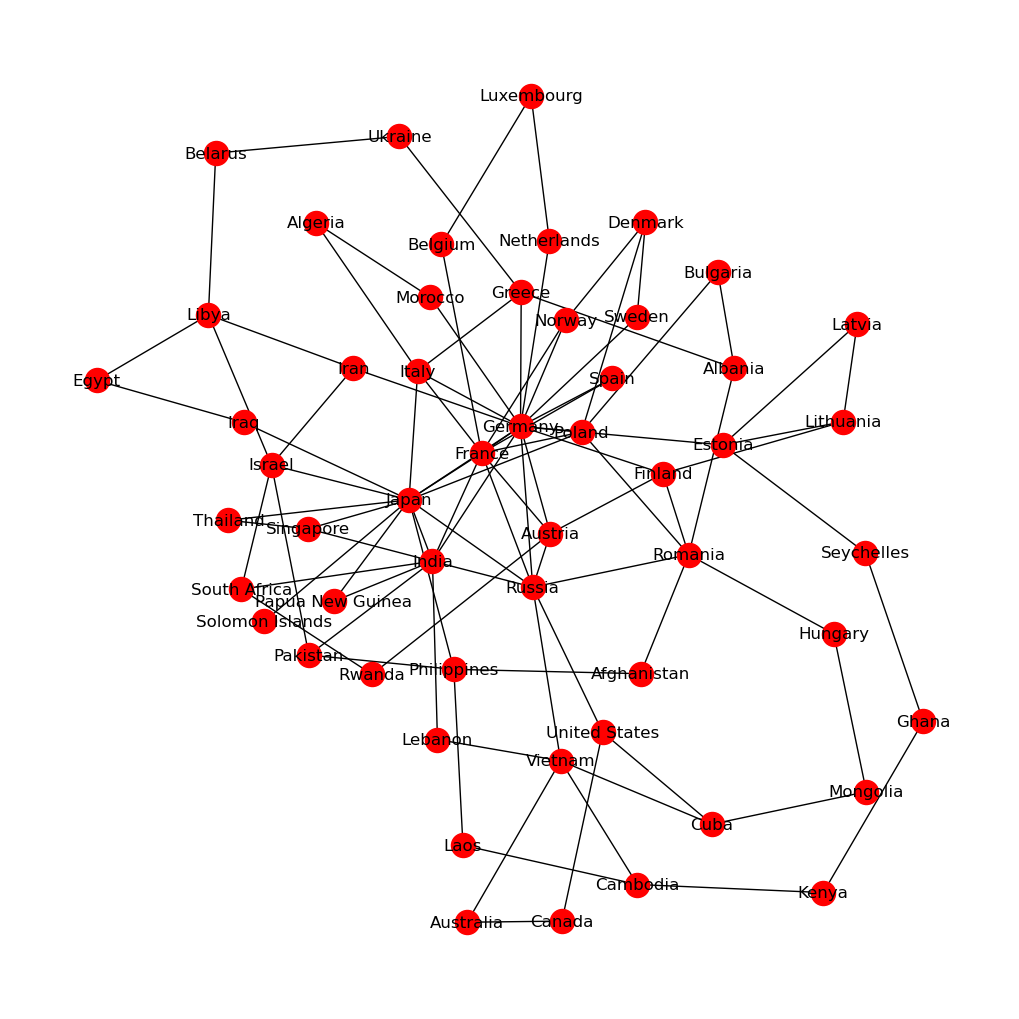

In [6]:
plt.figure(figsize = (10,10))
pos = nx.kamada_kawai_layout (G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)

In [7]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_= True)
net.repulsion()
net.show("country.html")

country.html


In [8]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [9]:
new_com = coms.to_node_community_map()

In [10]:
new_com

defaultdict(list,
            {'France': [0],
             'Germany': [0],
             'Italy': [0],
             'Spain': [0],
             'Poland': [0],
             'Denmark': [0],
             'Norway': [0],
             'Sweden': [0],
             'Netherlands': [0],
             'Luxembourg': [0],
             'Belgium': [0],
             'Greece': [0],
             'Albania': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Bulgaria': [0],
             'Austria': [1],
             'Russia': [1],
             'Finland': [1],
             'Romania': [1],
             'Hungary': [1],
             'Mongolia': [1],
             'Cuba': [1],
             'United States': [1],
             'Canada': [1],
             'Australia': [1],
             'Vietnam': [1],
             'Ukraine': [2],
             'Belarus': [2],
             'Libya': [2],
             'Egypt': [2],
             'Iraq': [2],
             'Israel': [2],
             'South Africa': [

In [11]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k, v in new_com.items()}

Step 7: Visualize the output of the communities algorithm on a new network graph and save it as HTML. Write your observations in a Markdown cell. Does the partition make sense according to history? What other conclusions can you make about the connections between the communities? 

In [12]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

country_communities_leiden.html


Answer to Step 7: All of the communities make sense as represented. Germany, France, and Poland make sense for the World Wars, Russia and the US make sense for the Cold War, and Japan makes sense for it's colonial influence in Asia. I am curious about some of the smaller relations and how they connect to 20th century history.

Step 8: Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise. In the markdown cells underneath, note your observations about the outputs.

In [13]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.18867924528301885,
 'Austria': 0.09433962264150943,
 'Russia': 0.1509433962264151,
 'Germany': 0.3018867924528302,
 'Italy': 0.09433962264150943,
 'Spain': 0.03773584905660377,
 'Poland': 0.11320754716981132,
 'Estonia': 0.07547169811320754,
 'Latvia': 0.03773584905660377,
 'Lithuania': 0.05660377358490566,
 'Finland': 0.07547169811320754,
 'Denmark': 0.05660377358490566,
 'Norway': 0.05660377358490566,
 'Sweden': 0.03773584905660377,
 'Netherlands': 0.03773584905660377,
 'Luxembourg': 0.03773584905660377,
 'Belgium': 0.03773584905660377,
 'Greece': 0.07547169811320754,
 'Albania': 0.05660377358490566,
 'Ukraine': 0.03773584905660377,
 'Belarus': 0.03773584905660377,
 'Libya': 0.07547169811320754,
 'Egypt': 0.03773584905660377,
 'Iraq': 0.03773584905660377,
 'Japan': 0.24528301886792453,
 'Morocco': 0.03773584905660377,
 'Algeria': 0.03773584905660377,
 'Thailand': 0.03773584905660377,
 'Singapore': 0.05660377358490566,
 'Philippines': 0.07547169811320754,
 'Solomon Island

In [14]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [15]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

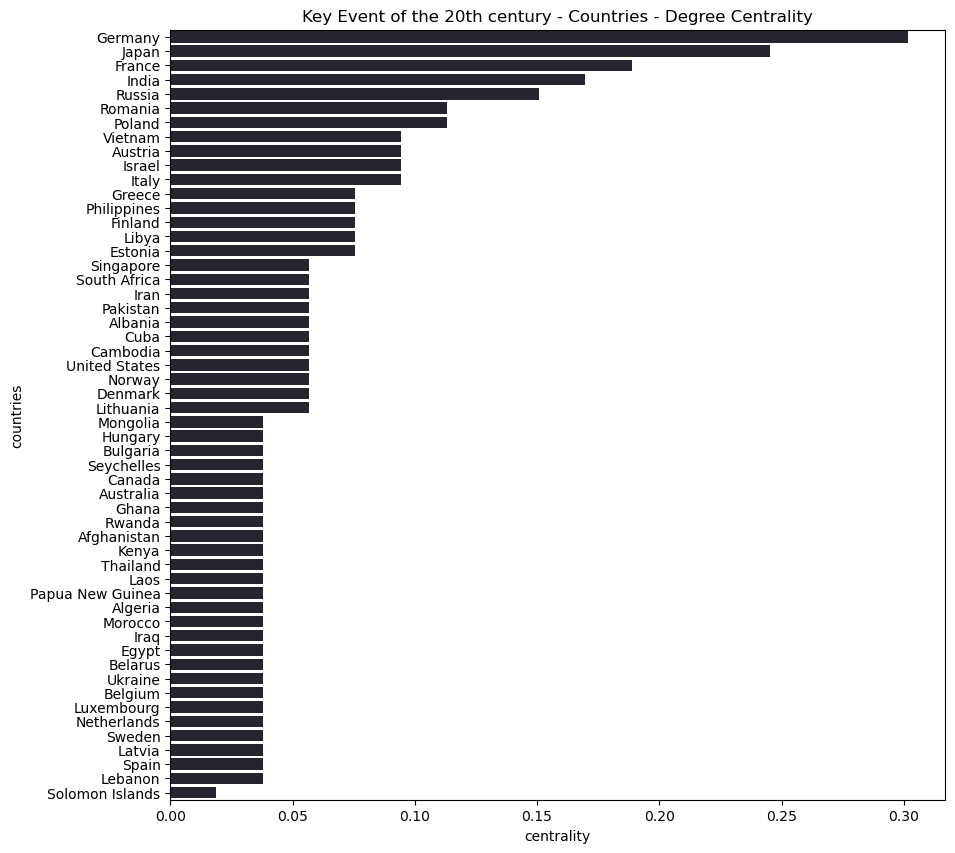

In [16]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
plt.tight_layout()
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("Key Event of the 20th century - Countries - Degree Centrality")

Answer to Step 8 (1): It doesn't surprise me Germany has the highest degree centrality, due to it's role in both World Wars. Japan is second highest for similar reasons.

In [17]:
# Closeness Centrality

closeness_dict = nx.closeness_centrality(G)
closeness_dict

{'France': 0.4491525423728814,
 'Austria': 0.38686131386861317,
 'Russia': 0.4608695652173913,
 'Germany': 0.5096153846153846,
 'Italy': 0.38686131386861317,
 'Spain': 0.34415584415584416,
 'Poland': 0.40458015267175573,
 'Estonia': 0.363013698630137,
 'Latvia': 0.2760416666666667,
 'Lithuania': 0.28804347826086957,
 'Finland': 0.3732394366197183,
 'Denmark': 0.29608938547486036,
 'Norway': 0.34868421052631576,
 'Sweden': 0.34415584415584416,
 'Netherlands': 0.3464052287581699,
 'Luxembourg': 0.2623762376237624,
 'Belgium': 0.31736526946107785,
 'Greece': 0.3706293706293706,
 'Albania': 0.30994152046783624,
 'Ukraine': 0.28191489361702127,
 'Belarus': 0.24311926605504589,
 'Libya': 0.29775280898876405,
 'Egypt': 0.265,
 'Iraq': 0.33125,
 'Japan': 0.4732142857142857,
 'Morocco': 0.34415584415584416,
 'Algeria': 0.28342245989304815,
 'Thailand': 0.32515337423312884,
 'Singapore': 0.33544303797468356,
 'Philippines': 0.35570469798657717,
 'Solomon Islands': 0.3231707317073171,
 'India': 0

In [18]:
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [19]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

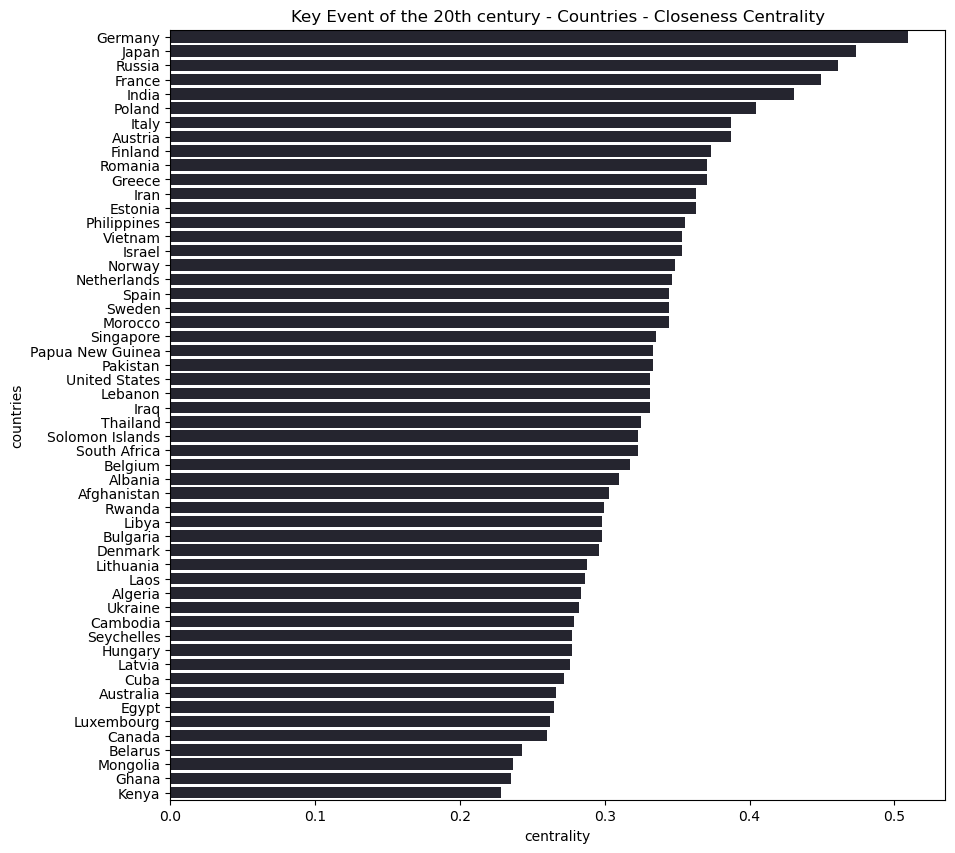

In [20]:
plt.figure(figsize = (10, 10))
plt.tight_layout()
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("Key Event of the 20th century - Countries - Closeness Centrality")

Answer to Step 8 (2):  Germany, Japan, and Russia are all central players in events of the 20th century.

In [21]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweenness_dict

{'France': 0.09020926111293538,
 'Austria': 0.03293650793650794,
 'Russia': 0.2280257051235205,
 'Germany': 0.40480307097735113,
 'Italy': 0.03744623466569842,
 'Spain': 0.0,
 'Poland': 0.07635312249264582,
 'Estonia': 0.10981733151544475,
 'Latvia': 0.0,
 'Lithuania': 0.007457322551662173,
 'Finland': 0.03787080044527908,
 'Denmark': 0.0026064344460570875,
 'Norway': 0.008049183520881627,
 'Sweden': 0.00533329354084071,
 'Netherlands': 0.024378556454028148,
 'Luxembourg': 0.000725689404934688,
 'Belgium': 0.012631603197640933,
 'Greece': 0.06336386222185626,
 'Albania': 0.014137930920453267,
 'Ukraine': 0.015510747114520707,
 'Belarus': 0.004518280461676688,
 'Libya': 0.034268090400165874,
 'Egypt': 0.0019351717464925011,
 'Iraq': 0.02682459050383578,
 'Japan': 0.25989214636185837,
 'Morocco': 0.008305026651600633,
 'Algeria': 0.000362844702467344,
 'Thailand': 0.0,
 'Singapore': 0.0012699564586357039,
 'Philippines': 0.05675527302885793,
 'Solomon Islands': 0.0,
 'India': 0.104570115

In [22]:
betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [23]:
betweenness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

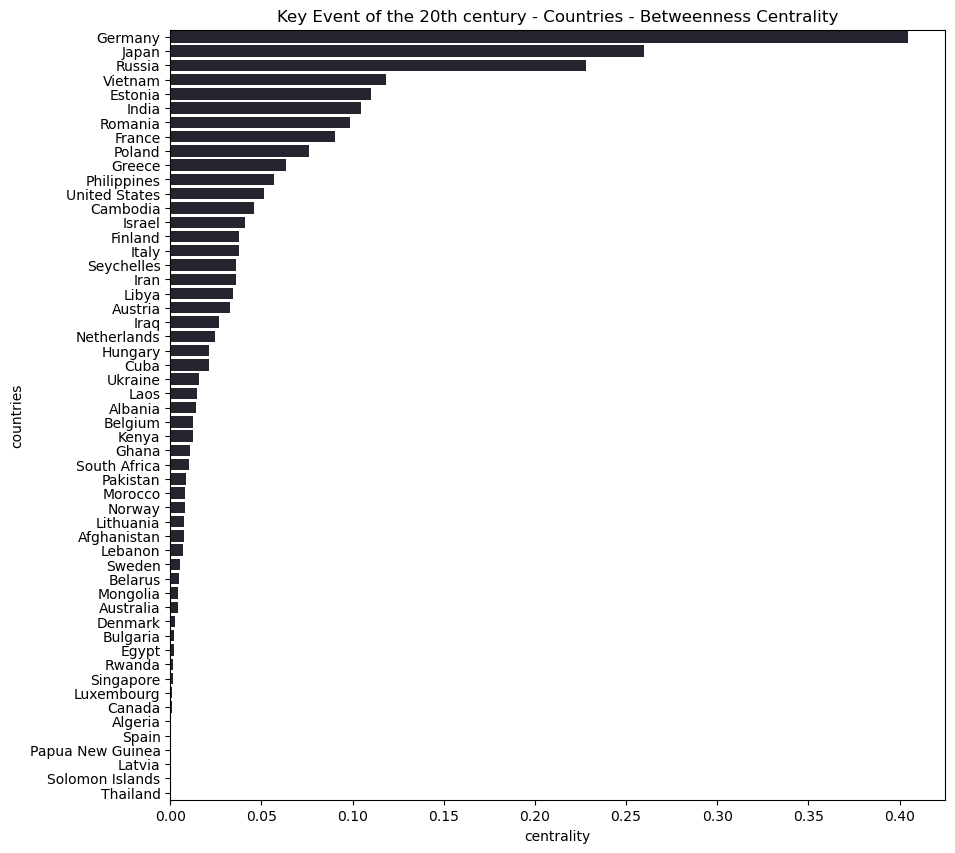

In [24]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweenness_df).set_title("Key Event of the 20th century - Countries - Betweenness Centrality")

Answer to Step 8 (3): Germany, Japan, and Russia are all pivotal to the history of the 20th century, giving them high betweenness centrality.